Each problem is worth 20 points. Problem 1 and 2 are graded based on the test set accuracy of your best model.

In [8]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib as mpt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.cluster import KMeans
from IPython.display import Image, display
from PIL import Image
from sklearn.decomposition import PCA

spam = pd.read_csv('spambase.csv', header = None)

### Problem 1   
Use the spamdata attached. After cleaning, doing variable selection (by various methods of your choice), divide the data into testing and training with 80, 20 rule. Make  Logistic Regression, Decision Tree, and Random Forest Models (pick your own number of estimators) to classify the last column with 0s and 1s ( mean spam and ham, respectively). Report the accuracies for all three models, both for testing and training. Which model is the winner?
(This problem will be graded based on your test accuracy for the winning model).

In [9]:
# Copied from week 10 notebook you posted.

correlations = spam.corr().abs() # Absolute value to sort.
sort = correlations.unstack().sort_values(kind="quicksort", ascending = False).to_frame(name="corr").reset_index()
#unstack changes from matrix to pairs.
sort[sort.level_0 == 57]

,level_0,level_1,corr
57,57,57,1.000000
141,57,20,0.383234
170,57,22,0.334787
172,57,6,0.332117
181,57,52,0.323629
200,57,18,0.273651
204,57,15,0.263215
206,57,16,0.263204
208,57,24,0.256723
212,57,56,0.249164


I'm choosing columns 20, 22, 6, and 52 as my independent variables as they are the only ones with a correlation above $0.3$, while there are a lot above $0.1$.

In [10]:
x = spam[[6,20,22,52]]
y = spam[57]
    # Dividing the data into testing and training with 80, 20 rule.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=69)

### Logistic Regression

In [11]:
spamlog = sm.Logit(ytrain, sm.add_constant(xtrain)).fit()
print(spamlog.summary())

Optimization terminated successfully.
         Current function value: 0.402223
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     57   No. Observations:                 3680
Model:                          Logit   Df Residuals:                     3675
Method:                           MLE   Df Model:                            4
Date:                Thu, 04 May 2023   Pseudo R-squ.:                  0.3983
Time:                        19:30:04   Log-Likelihood:                -1480.2
converged:                       True   LL-Null:                       -2460.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8513      0.061    -30.590      0.000      -1.970      -1.733
6              4.7315      0.

In [12]:
# Prediction using training data. This prediction compares with ytrain.
yltrainpred = round(spamlog.predict(sm.add_constant(xtrain)))

# Prediction using testing data. This prediction compares with ytest.
yltestpred = round(spamlog.predict(sm.add_constant(xtest)))

In [13]:
print("Logistic_Training_Accuracy:",metrics.accuracy_score(ytrain, yltrainpred))
print("Logistic_Training_Confusion_Matrix")
print(confusion_matrix(ytrain, yltrainpred))

Logistic_Training_Accuracy: 0.8459239130434782
Logistic_Training_Confusion_Matrix
[[2137  110]
 [ 457  976]]


In [14]:
print("Logistic_Testing_Accuracy:",metrics.accuracy_score(ytest, yltestpred))
print("Logistic_Testing_Confusion_Matrix")
print(confusion_matrix(ytest, yltestpred))

Logistic_Testing_Accuracy: 0.8371335504885994
Logistic_Testing_Confusion_Matrix
[[519  22]
 [128 252]]


### Decision Tree

In [15]:
spamtree = DecisionTreeClassifier()
spamtree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [16]:
# Prediction using training data. This prediction compares with ytrain.
yttrainpred = spamtree.predict(xtrain)

# Prediction using testing data. This prediction compares with ytest.
yttestpred = spamtree.predict(xtest)

In [17]:
print("Decision_Tree_Training_Accuracy:",metrics.accuracy_score(ytrain, yttrainpred))
print("Decision_Tree_Training_Confusion_Matrix")
print(confusion_matrix(ytrain, yttrainpred))

Decision_Tree_Training_Accuracy: 0.9323369565217391
Decision_Tree_Training_Confusion_Matrix
[[2223   24]
 [ 225 1208]]


In [18]:
print("Decision_Tree_Testing_Accuracy:",metrics.accuracy_score(ytest, yttestpred))
print("Decision_Tree_Testing_Confusion_Matrix")
print(confusion_matrix(ytest, yttestpred))

Decision_Tree_Testing_Accuracy: 0.8577633007600435
Decision_Tree_Testing_Confusion_Matrix
[[509  32]
 [ 99 281]]


### Random Forest

In [19]:
spamforest = RandomForestClassifier(n_estimators=420, bootstrap = True)
spamforest.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=420)

In [20]:
# Prediction using training data. This prediction compares with ytrain.
yftrainpred = spamforest.predict(xtrain)

# Prediction using testing data. This prediction compares with ytest.
yftestpred = spamforest.predict(xtest)

In [21]:
print("Random_Forest_Training_Accuracy:",metrics.accuracy_score(ytrain, yftrainpred))
print("Random_Forest_Training_Confusion_Matrix")
print(confusion_matrix(ytrain, yftrainpred))

Random_Forest_Training_Accuracy: 0.9323369565217391
Random_Forest_Training_Confusion_Matrix
[[2212   35]
 [ 214 1219]]


In [22]:
print("Random_Forest_Testing_Accuracy:",metrics.accuracy_score(ytest, yftestpred))
print("Random_Forest_Testing_Confusion_Matrix")
print(confusion_matrix(ytest, yftestpred))

Random_Forest_Testing_Accuracy: 0.8642779587404995
Random_Forest_Testing_Confusion_Matrix
[[504  37]
 [ 88 292]]


The Random Forest model just edges out the Decision Tree model as the winner. Their training accuracies are equal, but the Random Forest model has a slightly higher testing accuracy.

### Problem 2 
Continuing with the three models from problem 1, plot the ROC curve for the training and testing both in a graph for each model. This means that you will have to make three plots. Then find the AUC score for the testing and pick the best model you have.

### Logistic Regression

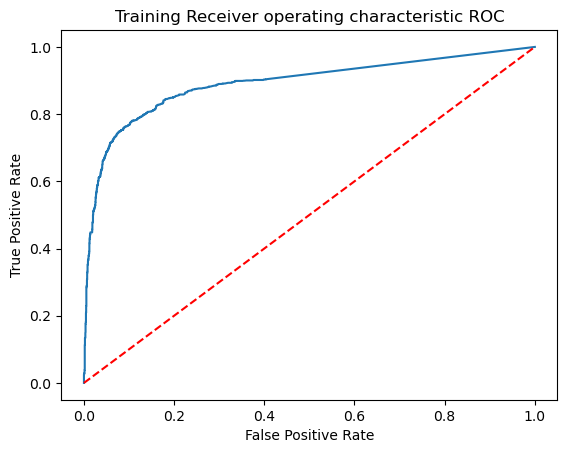

In [23]:
fpr, tpr, thresholds = roc_curve(ytrain, spamlog.predict(sm.add_constant(xtrain)))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training Receiver operating characteristic ROC')
plt.show()

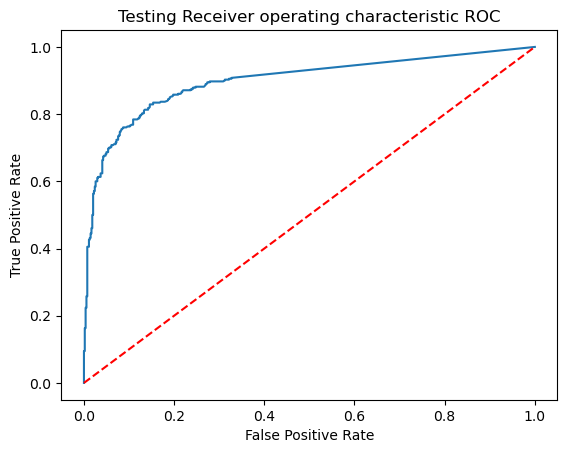

In [24]:
fpr, tpr, thresholds = roc_curve(ytest, spamlog.predict(sm.add_constant(xtest)))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing Receiver operating characteristic ROC')
plt.show()

In [25]:
log_testing_roc_auc = roc_auc_score(ytest, yltpred)
log_testing_roc_auc

NameError: name 'yltpred' is not defined

### Decision Tree

In [ ]:
fpr, tpr, thresholds = roc_curve(ytrain, yttrainpred) # The ytrainpred variable I think is wrong here, as with the other plots.
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Training Receiver operating characteristic ROC')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(ytest, yttestpred)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Testing Receiver operating characteristic ROC')
plt.show()

In [ ]:
dtree_testing_roc_auc = roc_auc_score(ytest, yttestpred)
dtree_testing_roc_auc

### Random Forest

In [ ]:
fpr, tpr, thresholds = roc_curve(ytrain, yftrainpred)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Training Receiver operating characteristic ROC')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(ytest, yftestpred)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Testing Receiver operating characteristic ROC')
plt.show()

In [ ]:
rf_testing_roc_auc = roc_auc_score(ytest, yftestpred)
rf_testing_roc_auc

Here the best model is the logistic regression. Its AUC score is the highest at $0.8981004961572138$. Though I think that I did something wrong as the other ROC curves look much different from the log ROC curve.

### Problme 3
Use the original data (after removing null values, if any) but only the variables you selected to use in problem 1. Remove the last column ( dependent variable) with 0s and 1s as you will be using the clustering algorithm here. Train a KMeans clustering model in this problem (no need to split in test and train) and find 4 clusters. The clustering algorithm finds clusters, and you do not need to worry about the accuracy score here (needs more advanced concepts). Find a pair of variables ( x and y) among the ones you used for the KMeans model and plot 4 clusters with four different colors. Try various x and y  before settling on a graph that clearly shows 4 clusters on the graph.  Here is reference material on KMeans from one of the reference textbooks we use. https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

In [ ]:
X=np.array(x)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker = 'x', c='black', s=100, alpha=0.5);

### Problem 4
Plot the decision boundary from the KMeans algorithm in problem 3. You are separating four clusters by lines in this problem. Some hints are here. https://datascience.stackexchange.com/questions/53918/is-there-a-way-to-put-a-separate-line-between-clusters-for-k-means-clustering

In [ ]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
       cmap=plt.cm.Paired,
       aspect='auto', origin='lower')

plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='x', s=169, linewidths=3,
        color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


I was unable to edit the code from the provided link to make the decision bondaries for my KMeans model. Above is the uneddited code.

### Problem 5
Use a recent image you took ( colored and square image), apply principal component analysis using only 25% of the principal components, and plot both images side by side. Report the explained variance for each of the blue, green, red channels. Comment on the result and the process.

In [ ]:
mann = Image.open('Mann.jpg')
mann

In [ ]:
data = np.asarray(mann)

pca = PCA(50)
red, green, blue = cv2.split(data)

red_transfromed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transfromed)

green_transfromed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transfromed)

blue_transfromed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transfromed)

In [ ]:
img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted)))
plt.imshow(img_compressed)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 10))
axs[0].imshow(mann)
axs[1].imshow(img_comp)